In [ ]:
#test

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/ML/CS 4641 ML Project/uber-raw-data-sep14.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)
data.head()

FileNotFoundError: ignored

In [ ]:
#Data Cleaning
#Parse through Uber dataset and graph the different metrics. If there is a null or missing data that will be excluded.
#The type of regression needed will be determined after analyzing the plots.
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

sns.set(rc={'figure.figsize':(12, 10)})
sns.displot(data["Day"])

sns.displot(data["Hour"])

sns.displot(data["Weekday"])

df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [2]:
from scipy.io import arff
import pandas as pd

# load ARFF file
data, meta = arff.loadarff('data.arff')

# convert to pandas DataFrame
df = pd.DataFrame(data)

df.head()


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,29.0
1,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606,26.0
2,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,19.0
3,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,22.0
4,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809,23.0


In [3]:
# Check for missing values
df.isnull().sum().sum()

0

In [5]:
from sklearn.model_selection import train_test_split

# split the data into features (X) and target variable (y)
X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

# split the data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((14884, 81), (6379, 81))

In [6]:
from sklearn.linear_model import LassoCV
import numpy as np

# perform Lasso feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# get the feature names
feature_names = np.array(X.columns)

# features with non-zero coefficients
selected_features_lasso = feature_names[lasso.coef_ != 0]

selected_features_lasso

array(['range_atomic_mass', 'range_fie', 'range_atomic_radius',
       'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density',
       'range_Density', 'wtd_range_Density', 'std_Density',
       'wtd_std_Density', 'gmean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'wtd_mean_ThermalConductivity',
       'wtd_std_ThermalConductivity'], dtype=object)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# perform PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

X_train_pca.shape

(14884, 17)

In [8]:
# # create a copy of the training data
# X_train_nan = X_train.copy()

# # randomly choose indices of the numpy array
# nan_indices = np.random.choice(X_train_nan.size, replace=False, size=int(X_train_nan.size * 0.05))

# # convert indices to 2D
# row_indices, col_indices = np.unravel_index(nan_indices, X_train_nan.shape)

# # assign NaN values
# X_train_nan.values[row_indices, col_indices] = np.nan

# # check the number of missing values
# X_train_nan.isnull().sum().sum()

60280

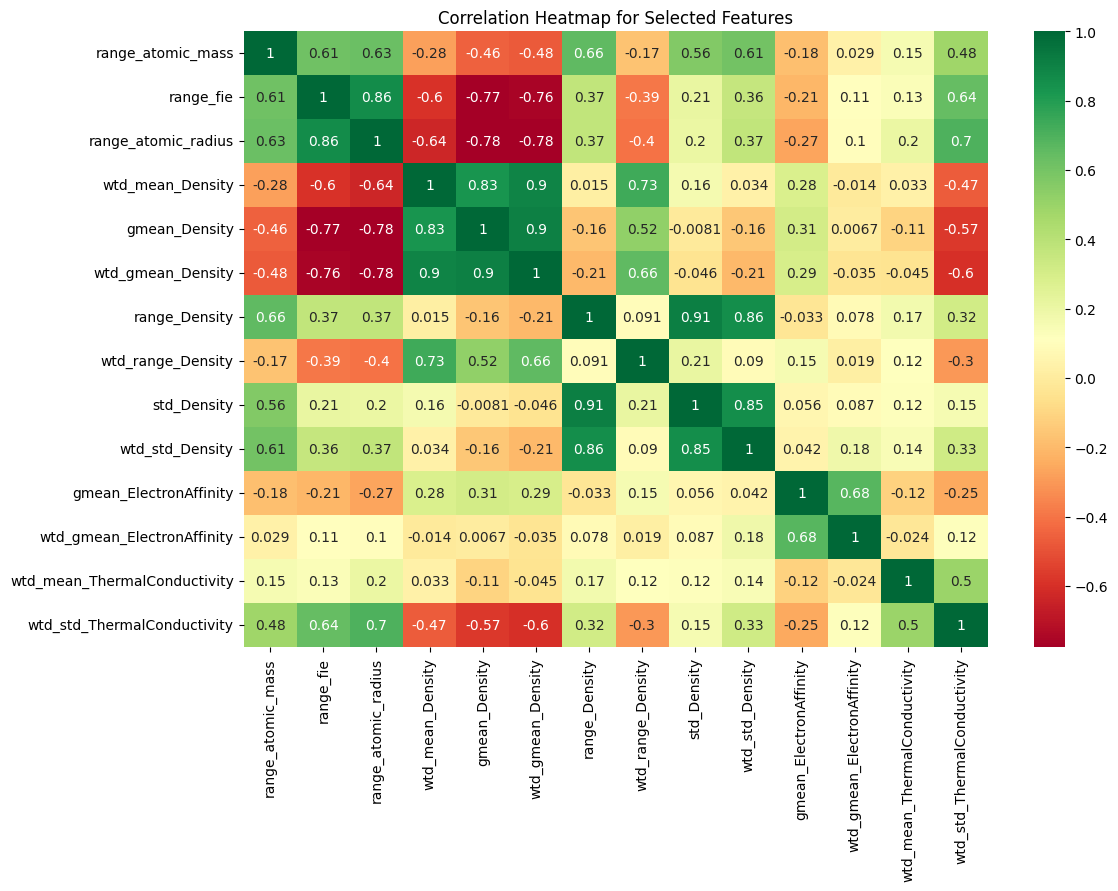

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix with Heatmap for selected features
selected_features = selected_features_lasso.tolist()
corrmat = X_train_imputed[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

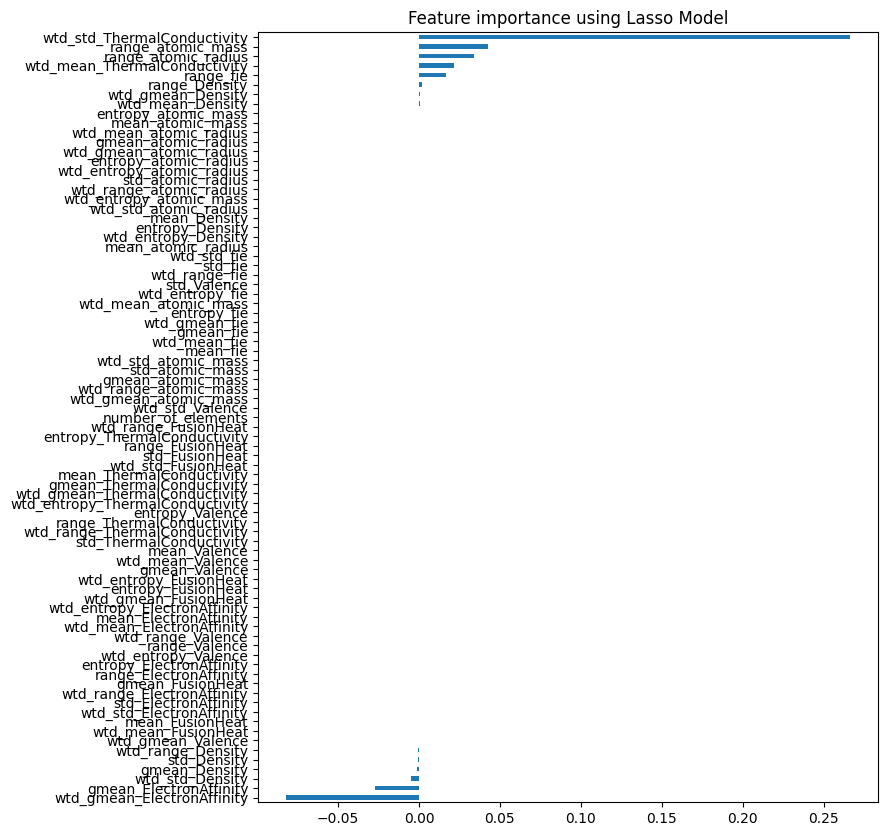

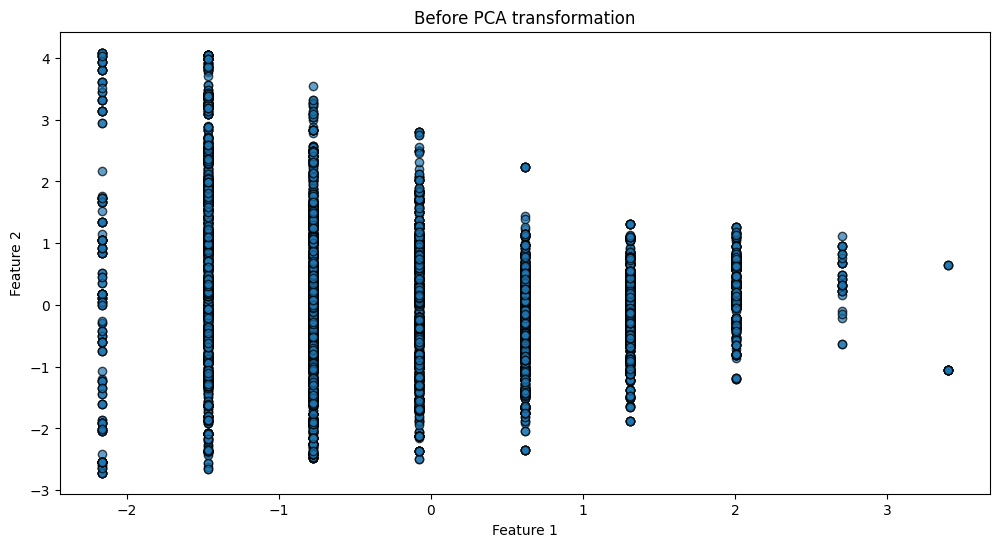

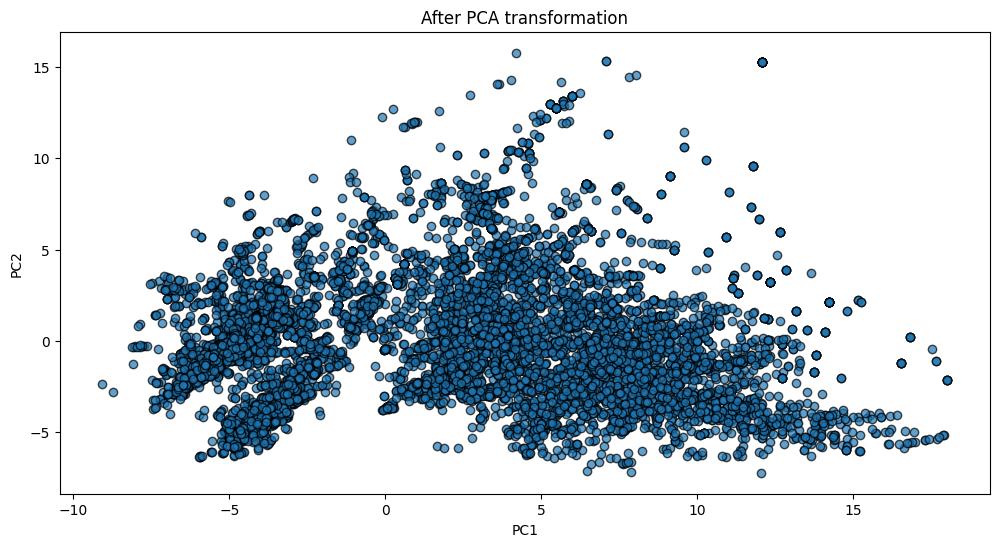

In [13]:
# Feature importance using Lasso Model
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.figure(figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

# Visualizing before PCA transformation
plt.figure(figsize=(12, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], edgecolor='k', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before PCA transformation')
plt.show()

# Visualizing after PCA transformation
plt.figure(figsize=(12, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], edgecolor='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('After PCA transformation')
plt.show()

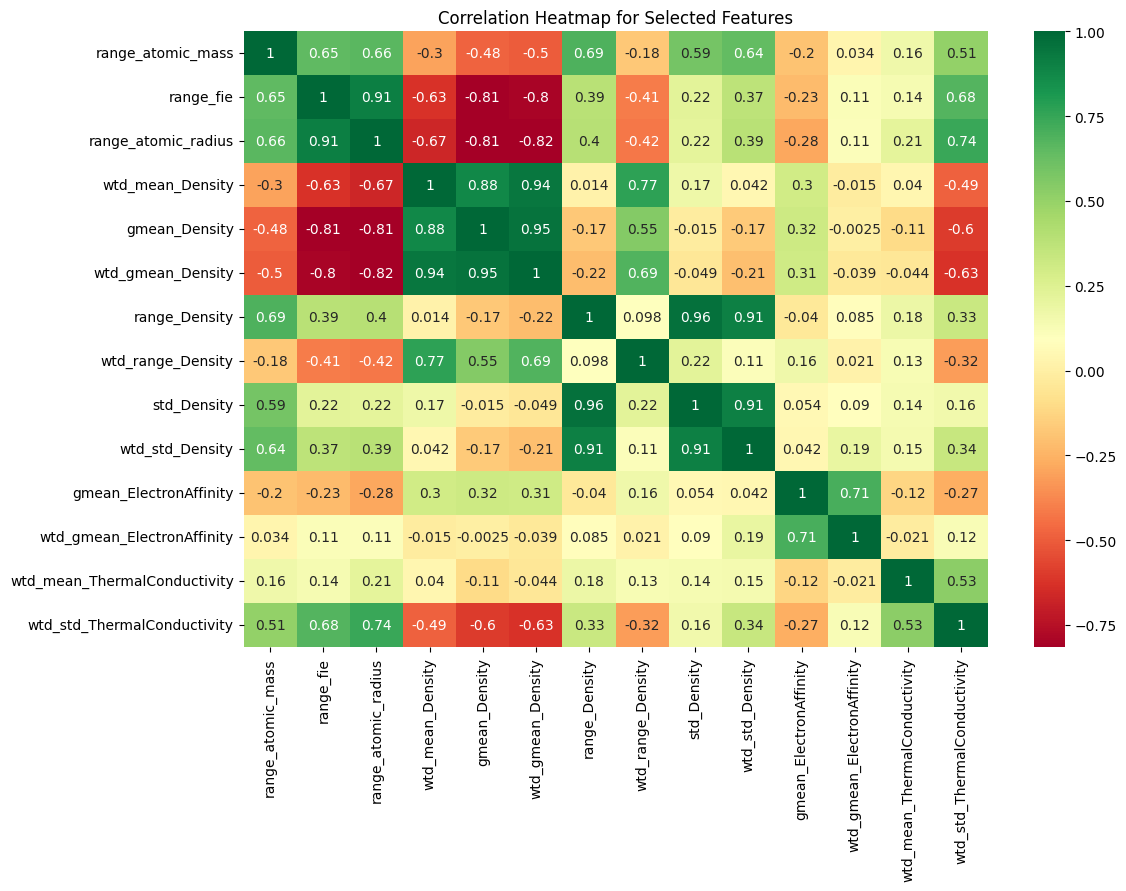

In [12]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

# Split the data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Lasso feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Get the feature names
feature_names = np.array(X.columns)

# Features with non-zero coefficients
selected_features_lasso = feature_names[lasso.coef_ != 0]

# Scale the numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fill the missing values with column means
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Convert back to DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Correlation matrix with Heatmap for selected features
selected_features = selected_features_lasso.tolist()
corrmat = X_train_imputed[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

In [9]:
# from sklearn.impute import SimpleImputer

# # creating an imputer
# imputer = SimpleImputer()

# # Fill the missing values with column means
# X_train_imputed = imputer.fit_transform(X_train_nan)

# # convert back to DataFrame
# X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# # check again for missing values
# X_train_imputed.isnull().sum().sum()

0

In [10]:
# save the original data to a .csv file
df.to_csv('original_data.csv', index=False)

# concatenate the cleaned features and target for the training data
cleaned_data = pd.concat([X_train_imputed, y_train.reset_index(drop=True)], axis=1)

# save the cleaned data to a .csv file
cleaned_data.to_csv('cleaned_data.csv', index=False)

OSError: ignored

Feature Seleciton and More Cleaning

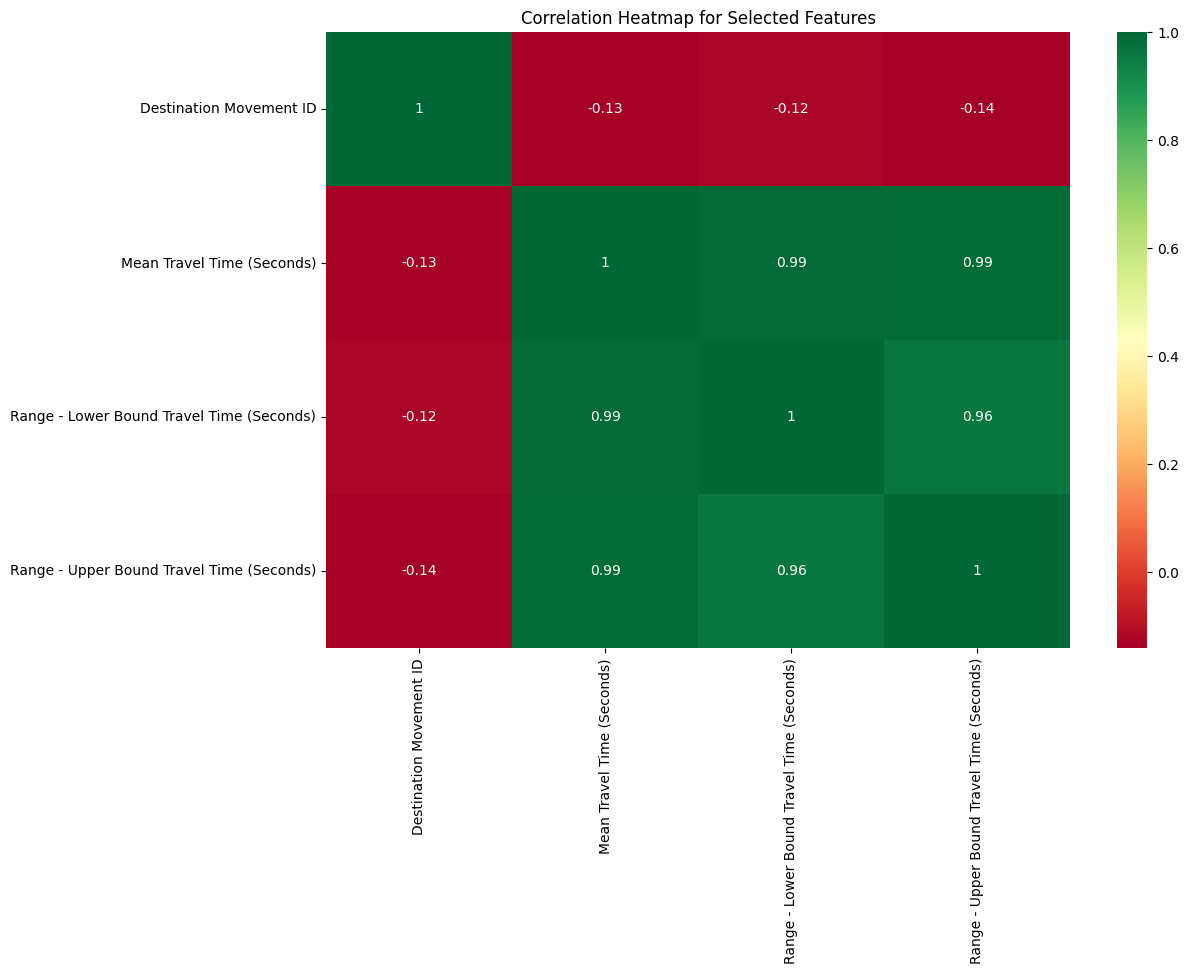

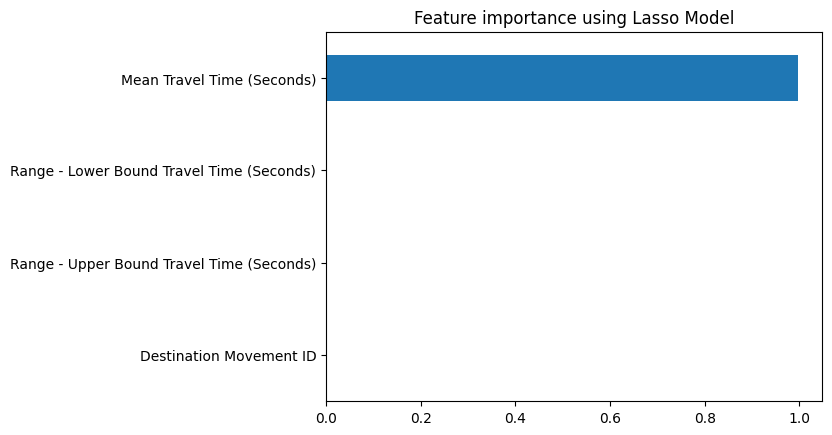

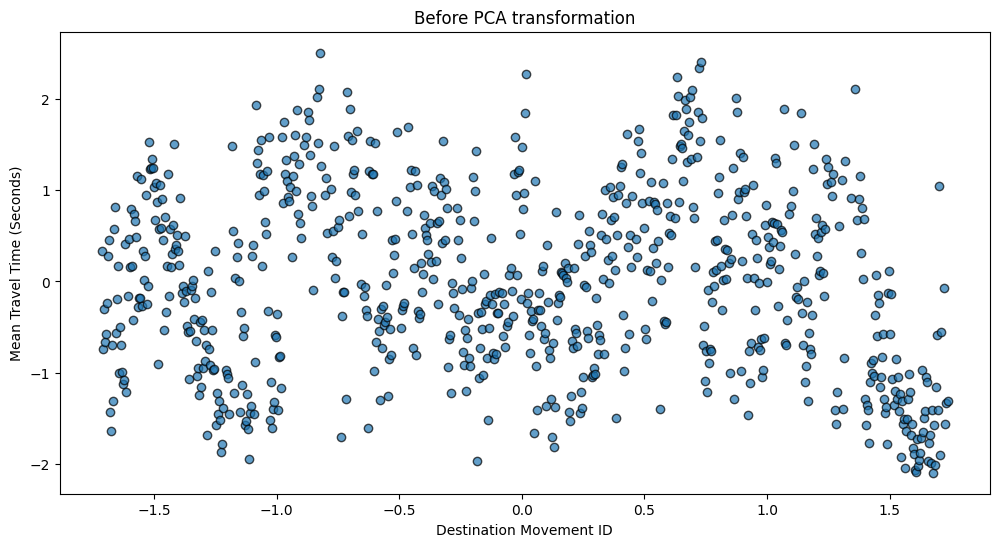

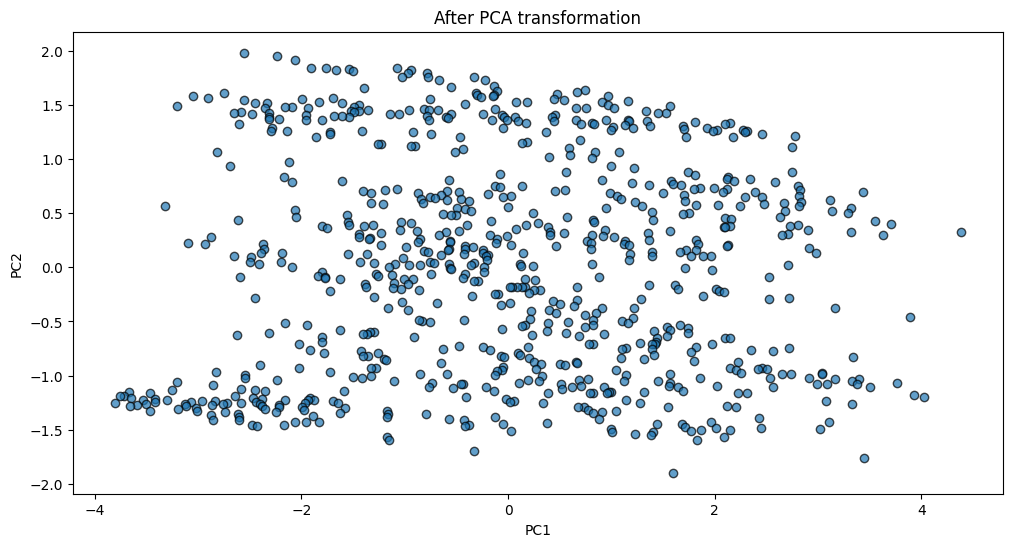

In [ ]:
# # Load necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LassoCV
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# import seaborn as sns

# # Load the original data
# df = pd.read_csv('Travel_Times.csv')

# # Define categorical and numerical columns
# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Handle missing data
# for column in categorical_cols:
#     df[column].fillna('Unknown', inplace=True)

# imputer = SimpleImputer(strategy='median')
# df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


# for column in categorical_cols:
#     top10 = df[column].value_counts().index[:10]
#     df[column] = np.where(df[column].isin(top10), df[column], 'Other')

# df = pd.get_dummies(df, columns=categorical_cols)

# # Scale the numerical columns
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# # Correlation matrix with Heatmap for selected features
# selected_features = ['Destination Movement ID', 'Mean Travel Time (Seconds)', 'Range - Lower Bound Travel Time (Seconds)', 'Range - Upper Bound Travel Time (Seconds)']
# corrmat = df[selected_features].corr()
# plt.figure(figsize=(12,8))
# sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
# plt.title("Correlation Heatmap for Selected Features")
# plt.show()

# # Apply LASSO
# lasso = LassoCV()
# lasso.fit(df[selected_features], df['Mean Travel Time (Seconds)'])
# coef = pd.Series(lasso.coef_, index = df[selected_features].columns)
# imp_coef = coef.sort_values()
# imp_coef.plot(kind = "barh")
# plt.title("Feature importance using Lasso Model")
# plt.show()

# # Apply PCA
# pca = PCA(n_components=2)
# df_pca = pd.DataFrame(pca.fit_transform(df[selected_features]), columns=['PC1', 'PC2'])

# # Visualizing before PCA transformation
# plt.figure(figsize=(12, 6))
# plt.scatter(df[selected_features[0]], df[selected_features[1]], edgecolor='k', alpha=0.7)
# plt.xlabel(selected_features[0])
# plt.ylabel(selected_features[1])
# plt.title(f'Before PCA transformation')
# plt.show()

# # Visualizing the PCA transformation
# plt.figure(figsize=(12, 6))
# plt.scatter(df_pca['PC1'], df_pca['PC2'], edgecolor='k', alpha=0.7)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title(f'After PCA transformation')
# plt.show()

Code for XGBoost and LightGBM Model (test data, not actual data)

100%|██████████| 7/7 [01:46<00:00, 15.19s/it]


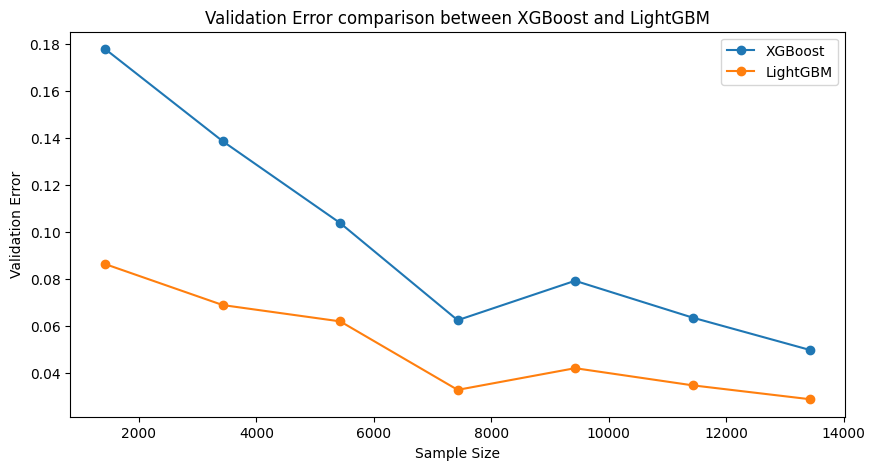

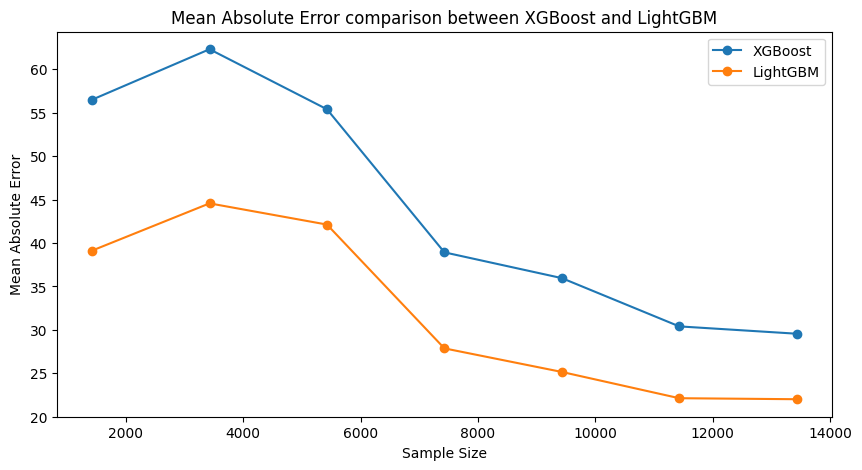

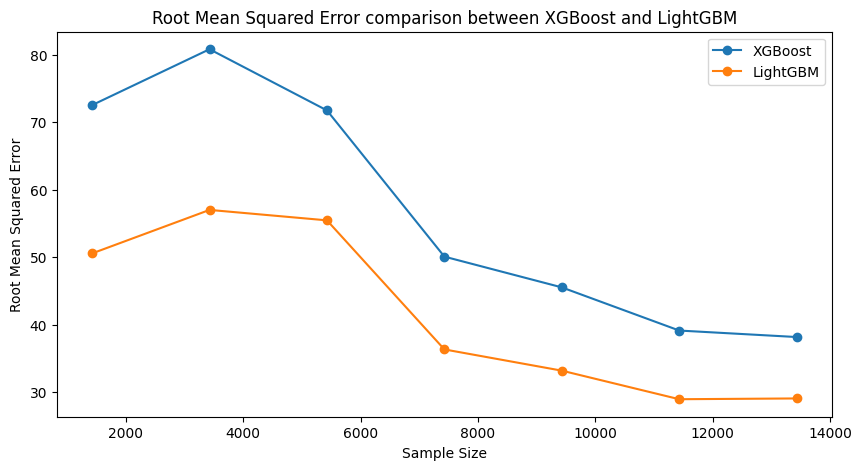

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression
from math import sqrt

import time
from tqdm import tqdm

# configuration
min_samples = 1000
max_samples = 10000
step = 2000

# Dictionaries to store metrics
xgb_metrics = {"sample_size": [], "runtime": [], "mae": [], "rmse": [], "val_error": []}
lgbm_metrics = {"sample_size": [], "runtime": [], "mae": [], "rmse": [], "val_error": []}

for sample_size in tqdm(range(int(min_samples/0.7), int(max_samples/0.7), step)):
  xgb_dummy = XGBRegressor(random_state=42, max_depth=6, n_jobs=-1) #default max depth determined from https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_depth.html#:~:text=The%20max_depth%20default%20value%20varies,XGBoost%3A%20default%20is%206.
  lgbm_dummy = LGBMRegressor(random_state=42, max_depth=5, n_jobs=-1) #default max depth determined from https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_depth.html#:~:text=The%20max_depth%20default%20value%20varies,XGBoost%3A%20default%20is%206.

  # generating the dataset of custom sample size
  dummy = make_regression(n_samples=sample_size)

  # splitting the data into train/validation/test sets
  X_temp, X_test, y_temp, y_test = train_test_split(dummy[0], dummy[1], test_size=0.15, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

  # XGBoost
  start = time.time()
  xgb_dummy.fit(X_train, y_train)
  end = time.time()
  # storing metrics
  xgb_metrics["runtime"].append(end-start)
  xgb_metrics["sample_size"].append(sample_size)
  predictions = xgb_dummy.predict(X_val)
  xgb_metrics["mae"].append(mean_absolute_error(y_val, predictions))
  xgb_metrics["rmse"].append(sqrt(mean_squared_error(y_val, predictions)))
  xgb_metrics["val_error"].append(1 - xgb_dummy.score(X_val, y_val))  # error is 1 - score

  # LightGBM
  start = time.time()
  lgbm_dummy.fit(X_train, y_train)
  end = time.time()
  # storing metrics
  lgbm_metrics["runtime"].append(end-start)
  lgbm_metrics["sample_size"].append(sample_size)
  predictions = lgbm_dummy.predict(X_val)
  lgbm_metrics["mae"].append(mean_absolute_error(y_val, predictions))
  lgbm_metrics["rmse"].append(sqrt(mean_squared_error(y_val, predictions)))
  lgbm_metrics["val_error"].append(1 - lgbm_dummy.score(X_val, y_val))  # error is 1 - score

# plot validation error comparison
plt.figure(figsize=(10, 5))
plt.plot(xgb_metrics["sample_size"], xgb_metrics["val_error"], marker='o', label='XGBoost')
plt.plot(lgbm_metrics["sample_size"], lgbm_metrics["val_error"], marker='o', label='LightGBM')
plt.xlabel('Sample Size')
plt.ylabel('Validation Error')
plt.title('Validation Error comparison between XGBoost and LightGBM')
plt.legend()
plt.show()

# plot MAE comparison
plt.figure(figsize=(10, 5))
plt.plot(xgb_metrics["sample_size"], xgb_metrics["mae"], marker='o', label='XGBoost')
plt.plot(lgbm_metrics["sample_size"], lgbm_metrics["mae"], marker='o', label='LightGBM')
plt.xlabel('Sample Size')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error comparison between XGBoost and LightGBM')
plt.legend()
plt.show()

# plot RMSE comparison
plt.figure(figsize=(10, 5))
plt.plot(xgb_metrics["sample_size"], xgb_metrics["rmse"], marker='o', label='XGBoost')
plt.plot(lgbm_metrics["sample_size"], lgbm_metrics["rmse"], marker='o', label='LightGBM')
plt.xlabel('Sample Size')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error comparison between XGBoost and LightGBM')
plt.legend()
plt.show()
